# Week3授業前課題1 アヤメの分析

### ポイント：pandasとデータの概観の調査、プロットについて

## 1.このテキストについて

テキストの目的
データ分析の基本的な流れを知る
データ分析ライブラリのPandasに慣れる

どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。


Iris setosa - Wikipedia
Iris virgicolor - Wikipedia
Iris virginica - Wikipedia

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

## 3.データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

目的変数も同様にyに格納してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
#データのダウンロードとXとY変数に代入
iris = load_iris()
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df_X.head()

df_Y = pd.DataFrame(iris.target)
df_Y.columns = ["Species"]
df_Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

Merge, join, and concatenate — pandas 0.24.2 documentation


pandas.concat — pandas 0.24.2 documentation

In [3]:
# データ結合 concat（axis=1）で列に配合
df = pd.concat((df_X, df_Y), axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4.データの概観

## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。


pandas.DataFrame.head — pandas 0.25.3 documentation


pandas.DataFrame.info — pandas 0.25.3 documentation


pandas.DataFrame.describe — pandas 0.25.3 documentation


pandas.DataFrame.isnull — pandas 0.25.3 documentation


pandas.DataFrame.sum — pandas 0.25.3 documentation


pandas.Series.value_counts — pandas 0.25.3 documentation



In [4]:
# 先頭から4番目までのサンプル表示　head(4)
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [5]:
# ラベルごとのサンプル数の合計
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [6]:
# 欠損値の個数の確認　(isnullはbool値、sumで個数のカウント)
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [7]:
# サマリ　特徴量の平均値と標準偏差、四分位数を一度に表示させる。
# mean:平均値 std:標準偏差 25%~75%:四分位数 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

【データセット】
https://en.wikipedia.org/wiki/Iris_flower_data_set

1936年生物学者ロナルド・フィッシャーの論文で分類学上の問題として示された。
データマイニングにおける教師あり手法と教師なし手法の違いを説明する良い例になります。
プログラミング言語のPythonとRには、データセットがあるため、ソースを知らなくてもアクセス可能。

sepal_length~petal_widthの4ラベルで3種類のどのアヤメに分類されるのか訓練データと正解データが用意されているデータセット。
sepal_length~petal_width：問題文に記述あり
Species：[0]がsetosa（ヒオウギアヤメ）、[1]がVersicolour(ブルーフラッグ)、[2]がVirginicaの変数データになっている。

【ガスぺ半島】
ガスぺ半島：北アメリカ大陸北部　南岸部には世界遺産のミグアシャ国立公園がある

## 5.特徴量についての探索

各特徴量や特徴量同士の関係を見ていきます。


## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### ▼locとilocの違い
locは「カラム"名"」や「インデックス"名"」を指定する
ilocは「カラム”番号”」や「インデックス"番号"」を指定する

In [8]:
# sepal_widthの列を３つの異なる方法で抽出する
df["sepal_width"]
df.loc[:, "sepal_width"]
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [9]:
# 50番目から99番目までのデータを抽出する コメントアウトしているやり方でも可能
df[50:100]
#df.loc[50:100]
#df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [10]:
# petal_lengthの列の50番目から99番目までのデータを抽出する　※locやilocを使わず、スライシングのみでは不可
df.loc[50:100, "petal_length"]
#df.iloc[50:100, 2]

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64

In [11]:
# petal_widthの値が0.2のデータを抽出する queryを使う
df.query("petal_width == 0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

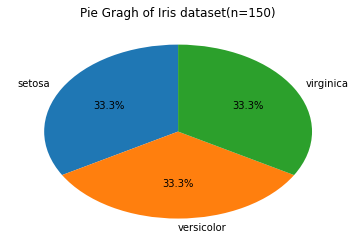

In [12]:
# グラフ描画の準備
labels = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

label_counts = df['Species'].value_counts()

fig, ax = plt.subplots()

# ラベルごとのサンプル数を円グラ
ax.pie(label_counts, labels=iris.target_names, startangle=90, autopct="%1.1f%%")
ax.set_title("Pie Gragh of Iris dataset(n=150)")

# ax.pie(df.iloc[3], autopct="%1.1f%%")
plt.show()

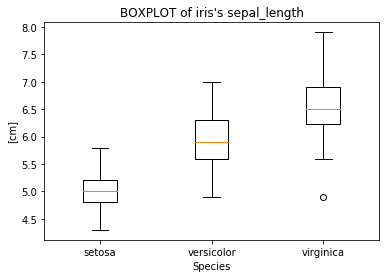

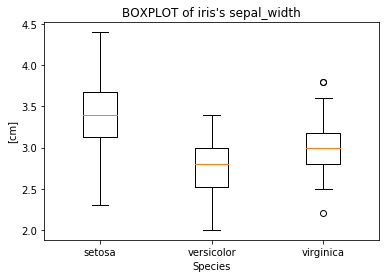

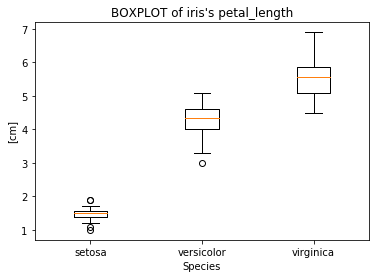

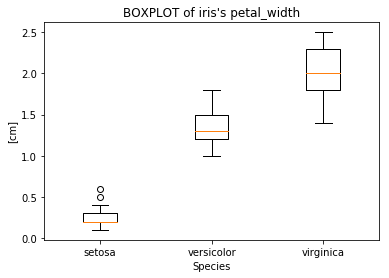

In [13]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features:
    plt.boxplot([df[df["Species"]==0][feature], df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2, 3], iris.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

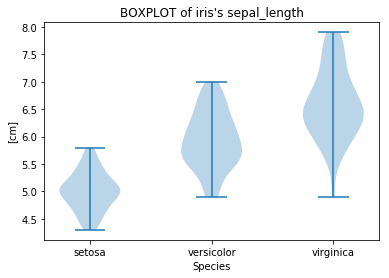

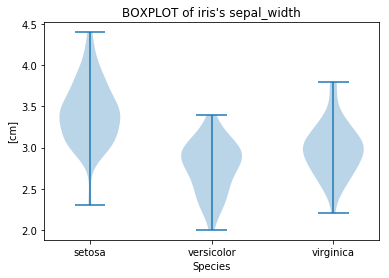

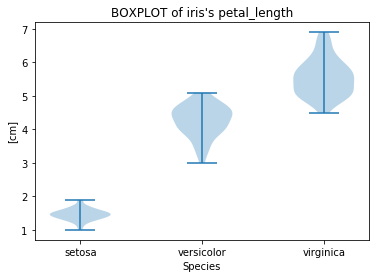

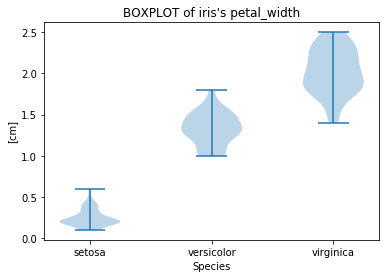

In [14]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features:
    plt.violinplot([df[df["Species"]==0][feature], df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2, 3], iris.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

### >>箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

### ▼考察
箱ひげ図（boxplot）は外れ値に影響が出やすい平均値ではない中央値や四分位数の把握がしやすいグラフである。
最大値から最小値の範囲を端の線で示し、中央の箱の辺が四分位数（25%と75%）、中央の線が中央値（50%値）を示している。
バイオリン図は、（存在を初めて知ったが）箱ひげ図同様の統計値を示すと共に、左右の膨らみが頻度を示し、
ヒストグラムのようにもなっている。（今回のデータセットではデータ数が150という少数のため、統計値は見えづらいものとなっている。）
注意点としてはカーネル密度推定という数値を描画しているようなので、必ずしも重なるわけではないということのようである。

ということで一般的には、頻度分布も可視化したい時はバイオリン図が適している。
データの前処理などを行っている場合に、外れ値があるか、本来存在しないはずの0が存在するかなどを可視化したい場合は箱ひげ図でも良いと思う。

今回のデータセットでの考察としては、petal_lengthのグラフが顕著で、オレンジ線が箱内上部のため4~6に値が集中していることが予想できる。バイオリン図で分布が確認できる。しかし1~2付近にも単峰が存在していることはバイオリン図がないとわからなかった。

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。


pandas.DataFrame.corr — pandas 0.24.2 documentation

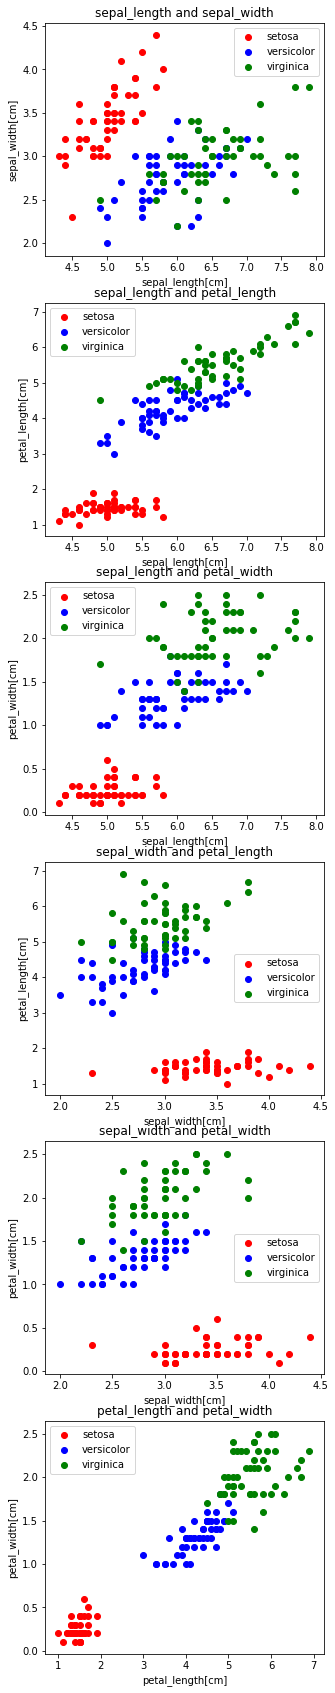

In [15]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

import itertools
combinations = list(itertools.combinations(df.columns[:4], 2)) # 組み合わせの取得
fig, axes = plt.subplots(6, figsize=(5,30)) # subplotsを使うと複数のグラフをまとめられる
for i, comb in enumerate(combinations):
    axes[i].set_title(comb[0]+' and '+comb[1])
    axes[i].set(xlabel=comb[0]+'[cm]', ylabel=comb[1]+'[cm]')
    axes[i].scatter(df[df['Species']==0][comb[0]], df[df['Species']==0][comb[1]], c = 'red', label=load_iris().target_names[0])
    axes[i].scatter(df[df['Species']==1][comb[0]], df[df['Species']==1][comb[1]], c = 'blue', label=load_iris().target_names[1])
    axes[i].scatter(df[df['Species']==2][comb[0]], df[df['Species']==2][comb[1]], c = 'green', label=load_iris().target_names[2])
    axes[i].legend()
plt.show()

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83

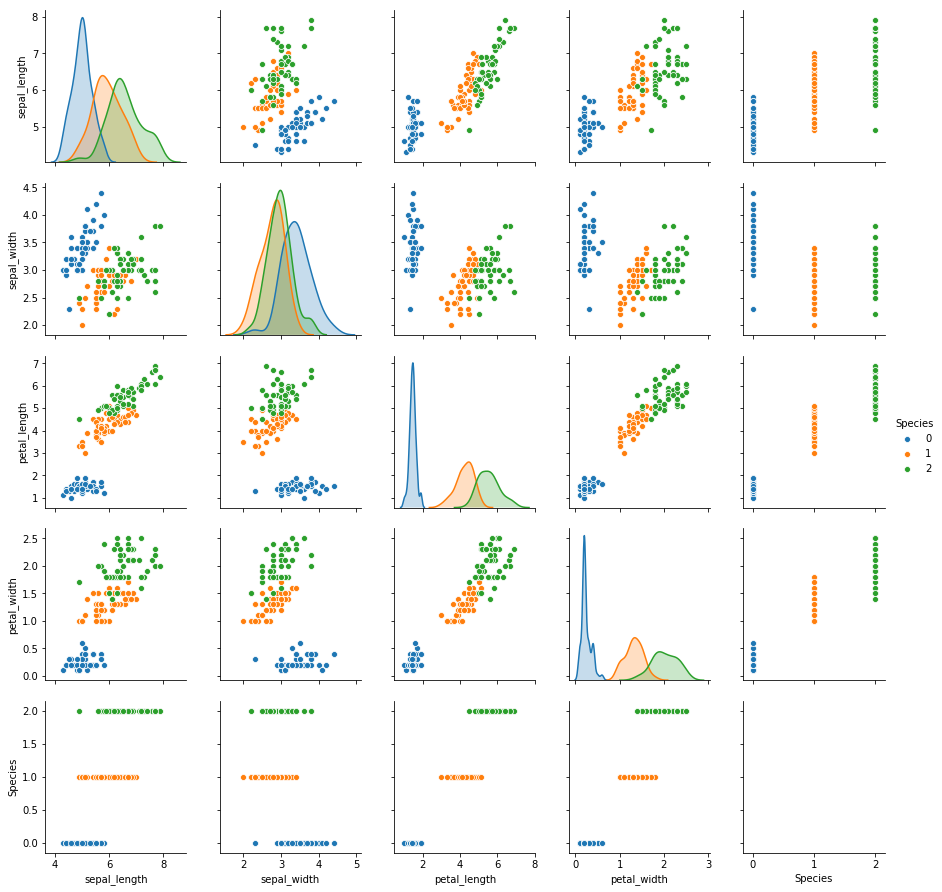

In [16]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
import seaborn as sns

sns.pairplot(df, hue="Species")

# ラベルごとに色分け

In [18]:
# ４つの特徴量に関する相関係数行列を作る
df_X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


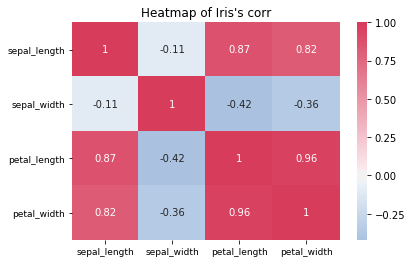

In [19]:
# 相関係数行列のヒートマップを作る
sns.heatmap(
    df_X.corr(),
    xticklabels=df_X.corr().columns,
    yticklabels=df_X.corr().columns,
    cmap=sns.diverging_palette(250, 5, as_cmap=True),
    center=0,
    annot=True,
    linecolor='white')

plt.title("Heatmap of Iris's corr")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

▼考察
散布図行列や相関係数ヒートマップ図から、petal（がく片）はlength（長さ）とwidth（幅）で相関係数が0に近い-0.11とほとんど相関関係が見られない。合わせて、sepal_width（がく片の幅）のみpetalとも相関関係が見られない（断定はできないが）。
petal（花弁）はlength（長さ）もwidth（幅）も1に近い0.96と強い相関関係が見られる。

このデータセットでクラスタリングすると、逆にsepal_widthの値が閾値のようなものになってくるということか？と分からないながら思いました。授業でもいずれ出てくることかと思いますので、楽しみにしたいと思います。

## 参考
円グラフ　https://pythondatascience.plavox.info/matplotlib/%E5%86%86%E3%82%B0%E3%83%A9%E3%83%95

バイオリン図　https://matplotlib.org/gallery/statistics/violinplot.html

seabornを使った散布図行列　https://note.nkmk.me/python-seaborn-pandas-pairplot/
    
## 作業時間
6h